# TP4 - Ondes, relation de dispersion

## ARGUELLO Camilo

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from IPython.display import display, Math

# Phase d'une onde

In [116]:
# Constants
v_0 = 37 # KHz

In [117]:
# distances
x = np.array([ 11, 10.9, 10.8, 10.7, 10.6, 10.5, 10.4, 10.3, 10.2, 10.1, 10]) # cm
dt = np.array([6,7.2,10,11.2,14,17.6,21,25,27,29,32]) # \mu s

T = 27 * np.ones(len(x)) # ms
phi = 2 * np.pi * (dt / T)

Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

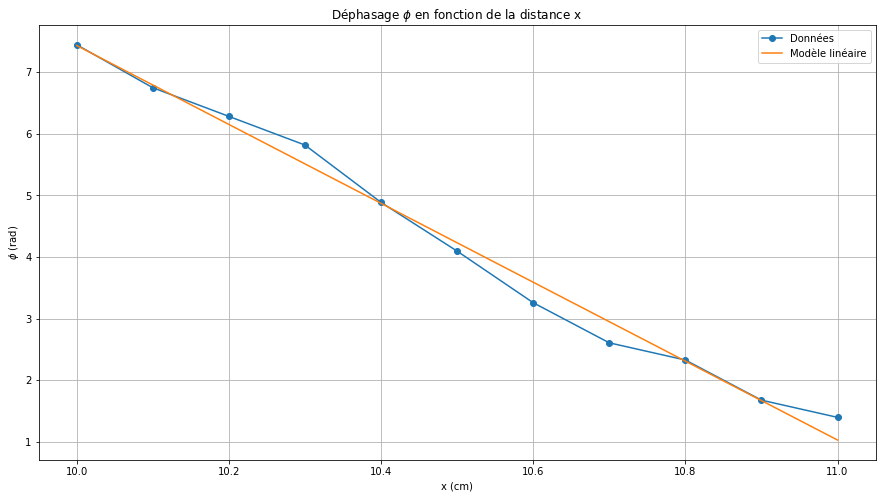

In [118]:
# ajuste lineal pour \phi = -kx + \phi_0

def f(x, k, phi0):
    return -k * x + phi0
  
def chi2(params):
    k, phi0 = params
    return np.sum((f(x, k, phi0) - phi)**2)
  
res = minimize(chi2, [8, 0])
print(res.message)
k, phi0 = res.x

# affichage des résultats
display(Math('k = %.2f \; cm^{-1}' % k))
display(Math('\\phi_0 = %.2f \; rad' % phi0))

# longueur d'onde = (x1 - x2)
lamb = 2 * np.pi / k # cm
display(Math('\\lambda = %.2f \; cm' % lamb))

# affichage du fit
plt.figure(figsize=(15, 8)) 
plt.plot(x, phi, 'o-', label='Données')
plt.plot(x, f(x, k, phi0), label='Modèle linéaire')
plt.xlabel('x (cm)')
plt.ylabel('$\\phi$ (rad)')
plt.title('Déphasage $\\phi$ en fonction de la distance x')
plt.legend()
plt.grid()
plt.show()

### B.4 Mesure de la relation de dispersion

In [129]:
# 15 Pulsation

# fréquence
v = 15 # Hz
delta_v = 0.1 # Hz

# Distance pour (5) franges
d = 12 # cm

# Calibration du système
l_B = 23 # cm
l_B_ecran = 32 # cm
G = l_B_ecran / l_B # cm

# Longueur d'onde
lam = d / 5 / G # cm
delta_lam = ( 0.1 / 5) # cm

# Nombre d'onde
k = 2 * np.pi / lam # cm^-1
delta_k = k * np.sqrt((delta_lam / lam)**2)

# Vitesse
c = v * lam # cm/s
delta_c = c * np.sqrt((delta_lam / lam)**2)

# Pulsation
w = k / 100 * c / 100 # rad/s 
delta_w = w * np.sqrt((delta_k / k)**2 + (delta_c / c)**2)

display(Math('\\lambda = %.2f \; \pm %.3f \; cm \;' % (lam, delta_lam)))
#display(Math('k = %.2f \; \pm %.3f \; cm^{-1} \;' % (k, delta_k)))
#display(Math('c = %.2f \; \pm %.3f \; cm \; s^{-1} \;' % (c, delta_c)))
#display(Math('\\omega = %.3e \; \pm %.2e \; rad \; s^{-1}' % (w, delta_w)))

<IPython.core.display.Math object>

In [123]:
def get_data_from_frequencies (v, lam, delta_lam, delta_v):
  # vitesse
  c = lam * v # cm s^-1
  delta_c = v * np.sqrt((delta_lam / lam)**2 + (delta_v / v)**2)

  # nombre d'onde
  k = 2 * np.pi / lam # cm^-1
  delta_k = 2 * np.pi * delta_lam / lam**2 # cm^-1

  # pulsation
  w = k / 100 * c / 100 # rad s^-1
  delta_w = np.sqrt((delta_k / k)**2 + (delta_c / c)**2) * w
  
  return c, delta_c, k, delta_k, w, delta_w

def create_dataframe (v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c):
  data = {
    'v (Hz)': v,
    'lambda (cm)': lam,
    'k (cm^-1)': k,
    'w (rad s^-1)': w,
    'c (cm s^-1)': c,
    'delta v (Hz)': delta_v,
    'delta lambda (cm)': delta_lam,
    'delta k (cm^-1)': delta_k,
    'delta w (rad s^-1)': delta_w,
    'delta c (cm s^-1)': delta_c
  }
  return pd.DataFrame(data)

In [130]:
# 16 - 17
# MEASURES POUR 15 - 50 Hz

####################
number_measures = 5

# Frequences allant de 15 à 50 Hz par pas de 5 Hz
v = np.array([ 15, 20, 25,30, 35, 40,45, 50 ]) # Hz
delta_v = 0.1 # Hz

# longueurs d'onde
lam = np.array([ 12,7.7,6.7,6.7,6,5.3,4.7,4.2 ]) / number_measures # cm
delta_lam = np.array([ 0.1, 0.08, 0.05, 0.05, 0.03, 0.02, 0.02, 0.01 ]) # cm

c, delta_c, k, delta_k, w, delta_w = get_data_from_frequencies(v, lam, delta_lam, delta_v)
df_15_50 = create_dataframe(v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c)

In [131]:
# 16 - 17 partie 2

## MEASURES POUR 15 - 3 Hz
####################

# Frequences allant de 15 à 3 Hz par pas de 2 Hz
v = np.array([ 15, 13, 11, 9, 7, 5, 3]) # Hz
delta_v = 0.1 # Hz

# longueurs d'onde
lam = np.array([15,15,16,19,20,25,30]) / number_measures # cm
delta_lam = np.array([0.1,0.1,0.15,0.15,0.20,0.30,0.30 ])

c, delta_c, k, delta_k, w, delta_w = get_data_from_frequencies(v, lam, delta_lam, delta_v)
df_15_03 = create_dataframe(v, lam, k, w, c, delta_v, delta_lam, delta_k, delta_w, delta_c)


Optimization terminated successfully.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

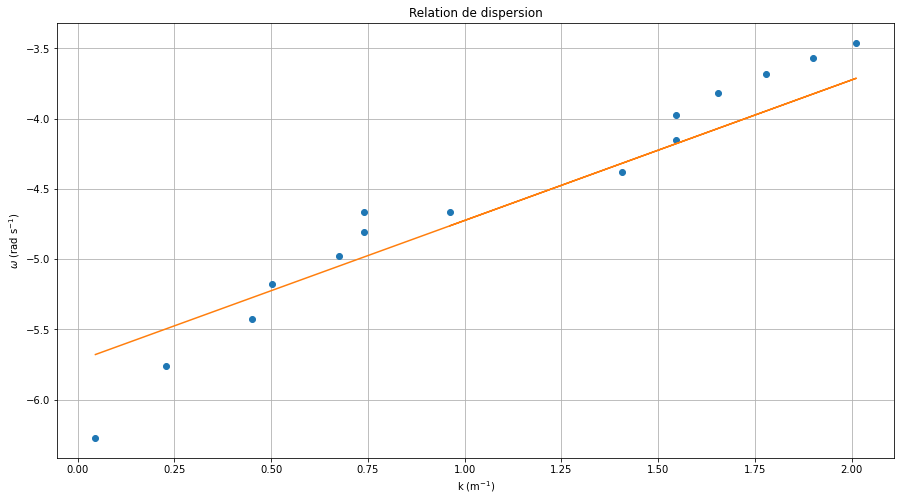

In [136]:
# 18 - 19

h = (4 / 1000) # m
# gravité
g = 9.81 # m s^-2
# masse volumique de l'eau
rho = 997 # kg m^-3
# tension de surface de l'eau (ajustée à la main)
gamma = 0.073 # N m^-1
# longueur capillaire
l_c = np.sqrt(gamma / (rho * g)) # m

# w(k) théorique (3 regime)
def w_k(k):
  return k * np.sqrt(g * h)

# concat dataframes
df = pd.concat([df_15_50, df_15_03], axis=0)

# find best fit y = m x + b
def f(x, m, b):
    return m * x + b
  
def chi2(params):
    m, b = params
    return np.sum((f(np.log(k_theorique), m, b) - np.log(w_theorique))**2)
  
k_theorique = df['k (cm^-1)'] / 100 # m^-1
w_theorique = w_k(k_theorique / 100) # rad s^-1
  
res = minimize(chi2, [1, 1])
print(res.message)
k, b = res.x

display(Math('k = %.2f \; m^{-1}' % k))
display(Math('b = %.2f' % b))

# Plot w en fonction de k
plt.figure(figsize=(15, 8))
plt.plot(np.log(df['k (cm^-1)']), np.log(df['w (rad s^-1)']), 'o', label='Théorique')
plt.plot(np.log(df['k (cm^-1)']), f(np.log(df['k (cm^-1)']), k, b) + 0.5, label='Modèle linéaire')
plt.xlabel('k (m$^{-1}$)')
plt.ylabel('$\\omega$ (rad s$^{-1}$)')
plt.title('Relation de dispersion')
plt.grid()
plt.show()

In [141]:
# Trouver la celerité selon la relation de dispersion k = w / c

c = w_theorique / k_theorique

display(Math('c = %.2e \; m \; s^{-1}' % c.mean()))


<IPython.core.display.Math object>